In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from util import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb


%matplotlib inline

In [2]:

filtered_data = pd.read_csv('import.csv')
filtered_data.head(2)

,Unnamed: 0,points,price,num_description,num_variety,year_code,cat_country,pos_sentiment,neg_sentiment,country_code,province_code,designation_code,point_cat
0,0,88.870874,20.0,0.002999,0.000015,2011.0,1,0.175,0.0,0,0,0,3
1,1,88.041695,28.0,0.003312,0.000030,2011.0,2,0.236,0.0,1,1,1,3


In [3]:
filtered_data.columns

Index(['Unnamed: 0', 'points', 'price', 'num_description', 'num_variety',
       'year_code', 'cat_country', 'pos_sentiment', 'neg_sentiment',
       'country_code', 'province_code', 'designation_code', 'point_cat'],
      dtype='object')

In [4]:
X = filtered_data[['points', 'num_description', 'num_variety','point_cat','pos_sentiment','neg_sentiment']]
y = filtered_data['price']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=101)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((34999, 6), (140000, 6), (34999,), (140000,))

In [6]:
X_train = X_train.fillna(X_train.mean())
y_train = y_train.fillna(y_train.mean())
X_test = X_test.fillna(X_test.mean())
y_test = y_test.fillna(y_test.mean())

In [7]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
trained_on = X_train.head(3)

In [9]:
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)

xgb_model.fit(X_train,y_train)


/home/aims/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:44:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [10]:
clf = Ridge(alpha=1.0)
clf.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [11]:
print(lm.intercept_)

-825.4724880709225


In [12]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
points,10.266393
num_description,-988.876230
num_variety,933.591773
point_cat,-15.253699
pos_sentiment,-17.667465
neg_sentiment,67.723921


In [13]:
import pickle
# pickle.dump(lm, open('model33.sav', 'wb'))
# loaded_model = pickle.load(open('model33.sav', 'rb'))

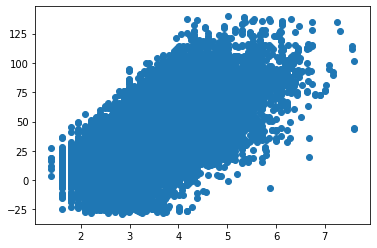

In [14]:
predictions = lm.predict(X_test)
plt.scatter(np.log(y_test),predictions)

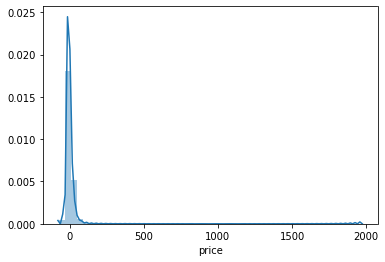

In [15]:
sns.distplot((y_test-predictions),bins=50);

In [16]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 16.4346147883571
MSE: 1129.5551301770658
RMSE: 33.60885493701126


In [17]:
y_pred = xgb_model.predict(X_test)
mse=metrics.mean_squared_error(y_test, y_pred)

print(np.sqrt(mse))

32.5450321974617


In [18]:
y_prediction = clf.predict(X_test)
mse_r=metrics.mean_squared_error(y_test, y_prediction)
np.sqrt(mse_r)

33.64629688185667

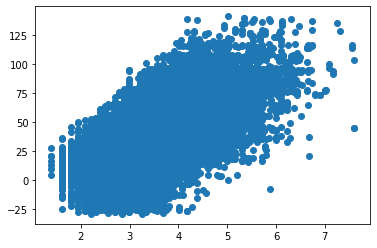

In [21]:
plt.scatter(np.log(y_test),y_prediction)

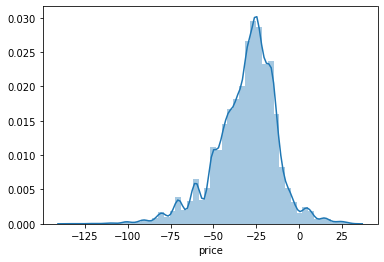

In [22]:
sns.distplot((np.log(y_test)-y_prediction),bins=50);

## Generate test results

In [23]:
test_data = pd.read_csv('data/test.csv')

wine_data = pd.read_csv('data/train.csv')

wine_data['title'] = wine_data.title.fillna('No title ')
wine_data['year_code'] = wine_data['title'].apply(lambda x: get_year(x))
wine_data['year_code'] = wine_data.year_code.fillna(int(wine_data.year_code.mean()))

country_price = wine_data[['country','price']]
country_price = country_price.groupby(['country'])['price'].mean().reset_index()
wine_data['title'] = wine_data.title.fillna('No title ')
wine_data['country'] = wine_data.country.fillna('No Country')
wine_data['province'] = wine_data.province.fillna('No province')
wine_data['designation'] = wine_data.designation.fillna('No designation')
wine_data['winery'] = wine_data.winery.fillna('No winery')
wine_data.head(2)


countries = list(wine_data['country'].unique())
province = list(wine_data['province'].unique())
# variety = list(wine_data['variety'].unique())
designation = list(wine_data['designation'].unique())
titles = list(wine_data['title'].unique())
winery = list(wine_data['winery'].unique())

In [24]:
import mca
test_data = test_data[pd.notnull(test_data['description'])]
test_data = test_data[pd.notnull(test_data['variety'])]

test_data['title'] = test_data.title.fillna('No title ')
test_data['country'] = test_data.country.fillna('No Country')
test_data['province'] = test_data.province.fillna('No province')
test_data['designation'] = test_data.designation.fillna('No designation')
test_data['winery'] = test_data.winery.fillna('No winery')


test_data['num_description'] = extract_text(test_data['description'])
test_data['num_variety'] = extract_text(test_data['variety'])

test_data['title'] = test_data.title.fillna('No title ')
test_data['year_code'] = test_data['title'].apply(lambda x: get_year(x))
test_data['year_code'] = test_data.year_code.fillna(int(test_data.year_code.mean()))

country_price = wine_data[['country','price']]
country_price = country_price.groupby(['country'])['price'].mean().reset_index()

countries = list(test_data['country'].unique())
test_data['cat_country'] = test_data['country'].apply(lambda x:get_average(x,country_price))

test_data['pos_sentiment'] = test_data['description'].apply(lambda x: sentiment_analyzer_scores(x,'pos'))

test_data['neg_sentiment'] = test_data['description'].apply(lambda x: sentiment_analyzer_scores(x,'neg'))

test_data['country_code'] = test_data['country'].apply(lambda x: get_country_num(x,countries) if x in countries else get_country_num('No Country',countries))

test_data['province_code'] = test_data['province'].apply(lambda x: get_province(x,province) if x in province else get_province('No province',province))

# test_data['variety_code'] = test_data['variety'].apply(lambda x: get_variety(x,variety))

test_data['designation_code'] = test_data['designation'].apply(lambda x: get_designation(x,designation) if x in designation else get_designation('No designation',designation))

test_data['winery'] = test_data['winery'].apply(lambda x: get_winery(x,winery) if x in winery else get_winery('No winery',winery))

# test_data['year_code'] = test_data['title'].apply(lambda x: get_year(x))

test_data['point_cat'] = test_data['points'].apply(lambda x:get_points(x))

filtered_data = test_data[['points', 'price','num_description', 'num_variety',
       'year_code', 'cat_country', 'pos_sentiment', 'neg_sentiment',
       'country_code', 'province_code', 'designation_code', 'point_cat']]



In [25]:
cou = mca.dummy(filtered_data[['cat_country']])
cou.columns = ['country1','country2','country3']


In [26]:


finalDf = pd.concat([cou, filtered_data], axis = 1)

# finalDf = finalDf.drop(['cat_country'],axis=1)

In [27]:
finalDf.columns

Index(['country1', 'country2', 'country3', 'points', 'price',
       'num_description', 'num_variety', 'year_code', 'cat_country',
       'pos_sentiment', 'neg_sentiment', 'country_code', 'province_code',
       'designation_code', 'point_cat'],
      dtype='object')

In [28]:
tempo = finalDf[['points', 'num_description', 'num_variety',
       'year_code', 'cat_country', 'pos_sentiment', 'neg_sentiment',
       'country_code', 'province_code', 'designation_code', 'point_cat']]
tempo.head(3)

,points,num_description,num_variety,year_code,cat_country,pos_sentiment,neg_sentiment,country_code,province_code,designation_code,point_cat
0,95.036469,0.004043,0.001063,2007.0,2,0.214,0.044,0,2,11070,4
1,90.966405,0.003308,0.000012,2012.0,2,0.171,0.000,1,73,1,4
2,88.964358,0.004595,0.000378,2013.0,2,0.053,0.000,0,2,22,3


In [ ]:
trained_on.head(2)

In [ ]:
tempo.head(2)

In [25]:
tempo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83210 entries, 0 to 83209
Data columns (total 11 columns):
points              83210 non-null float64
num_description     83210 non-null float64
num_variety         83210 non-null float64
year_code           83210 non-null float64
cat_country         83210 non-null int64
pos_sentiment       83210 non-null float64
neg_sentiment       83210 non-null float64
country_code        83210 non-null int64
province_code       83210 non-null int64
designation_code    83210 non-null int64
point_cat           83210 non-null int64
dtypes: float64(6), int64(5)
memory usage: 7.6 MB


In [27]:
predictions = lm.predict(tempo)

In [28]:
xjpredictions = xgb_model.predict(tempo)

In [ ]:
clfpredictions = clf.predict(tempo)

In [29]:
pd.DataFrame(predictions).to_csv('sample7.csv')
pd.DataFrame(xjpredictions).to_csv('sample8.csv')
pd.DataFrame(clfpredictions).to_csv('sample9.csv')